In [1]:
import os
import tarfile
import urllib

In [2]:
download_location = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
data_local_path = "C:\\Users\\Admin\\Desktop\\Machine Learning\\Hands on Machine learning\\datasets\\housing"

# Downloading and getting the data



In [3]:
# assert os.path.isfile(path)
def fetch_data():
    if not os.path.isdir(data_local_path):
        os.makedirs(data_local_path)
    tgz_path = os.path.join(data_local_path,"housing.tgz")
    urllib.request.urlretrieve(download_location,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=data_local_path)
    housing_tgz.close()

In [4]:
import pandas as pd
def load_house_data(data=data_local_path):
    temp_path = os.path.join(data,"housing.csv")
    return pd.read_csv(temp_path)
    

# Getting overview of the data

In [5]:
housing = load_house_data()

In [6]:
housing.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3486,-118.54,34.28,10.0,7665.0,999.0,3517.0,998.0,10.8805,500001.0,<1H OCEAN
9357,-122.54,37.96,33.0,2534.0,495.0,996.0,449.0,4.3083,500001.0,NEAR BAY
4119,-118.20,34.14,52.0,3800.0,646.0,1842.0,620.0,5.5524,293900.0,<1H OCEAN
14993,-117.03,32.72,37.0,2192.0,455.0,1515.0,446.0,3.0588,120600.0,NEAR OCEAN
14570,-117.21,32.83,35.0,2259.0,501.0,1340.0,511.0,3.4482,162500.0,NEAR OCEAN
17237,-119.66,34.43,27.0,5509.0,1059.0,2591.0,979.0,3.8456,500001.0,<1H OCEAN
11417,-117.96,33.70,23.0,4417.0,740.0,1865.0,693.0,5.3428,279300.0,<1H OCEAN
13740,-117.19,34.03,36.0,2223.0,361.0,942.0,331.0,4.6806,152400.0,INLAND
361,-122.12,37.75,33.0,1809.0,261.0,808.0,219.0,6.8600,250000.0,NEAR BAY
4660,-118.31,34.05,40.0,1667.0,365.0,1161.0,384.0,3.1406,417600.0,<1H OCEAN


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


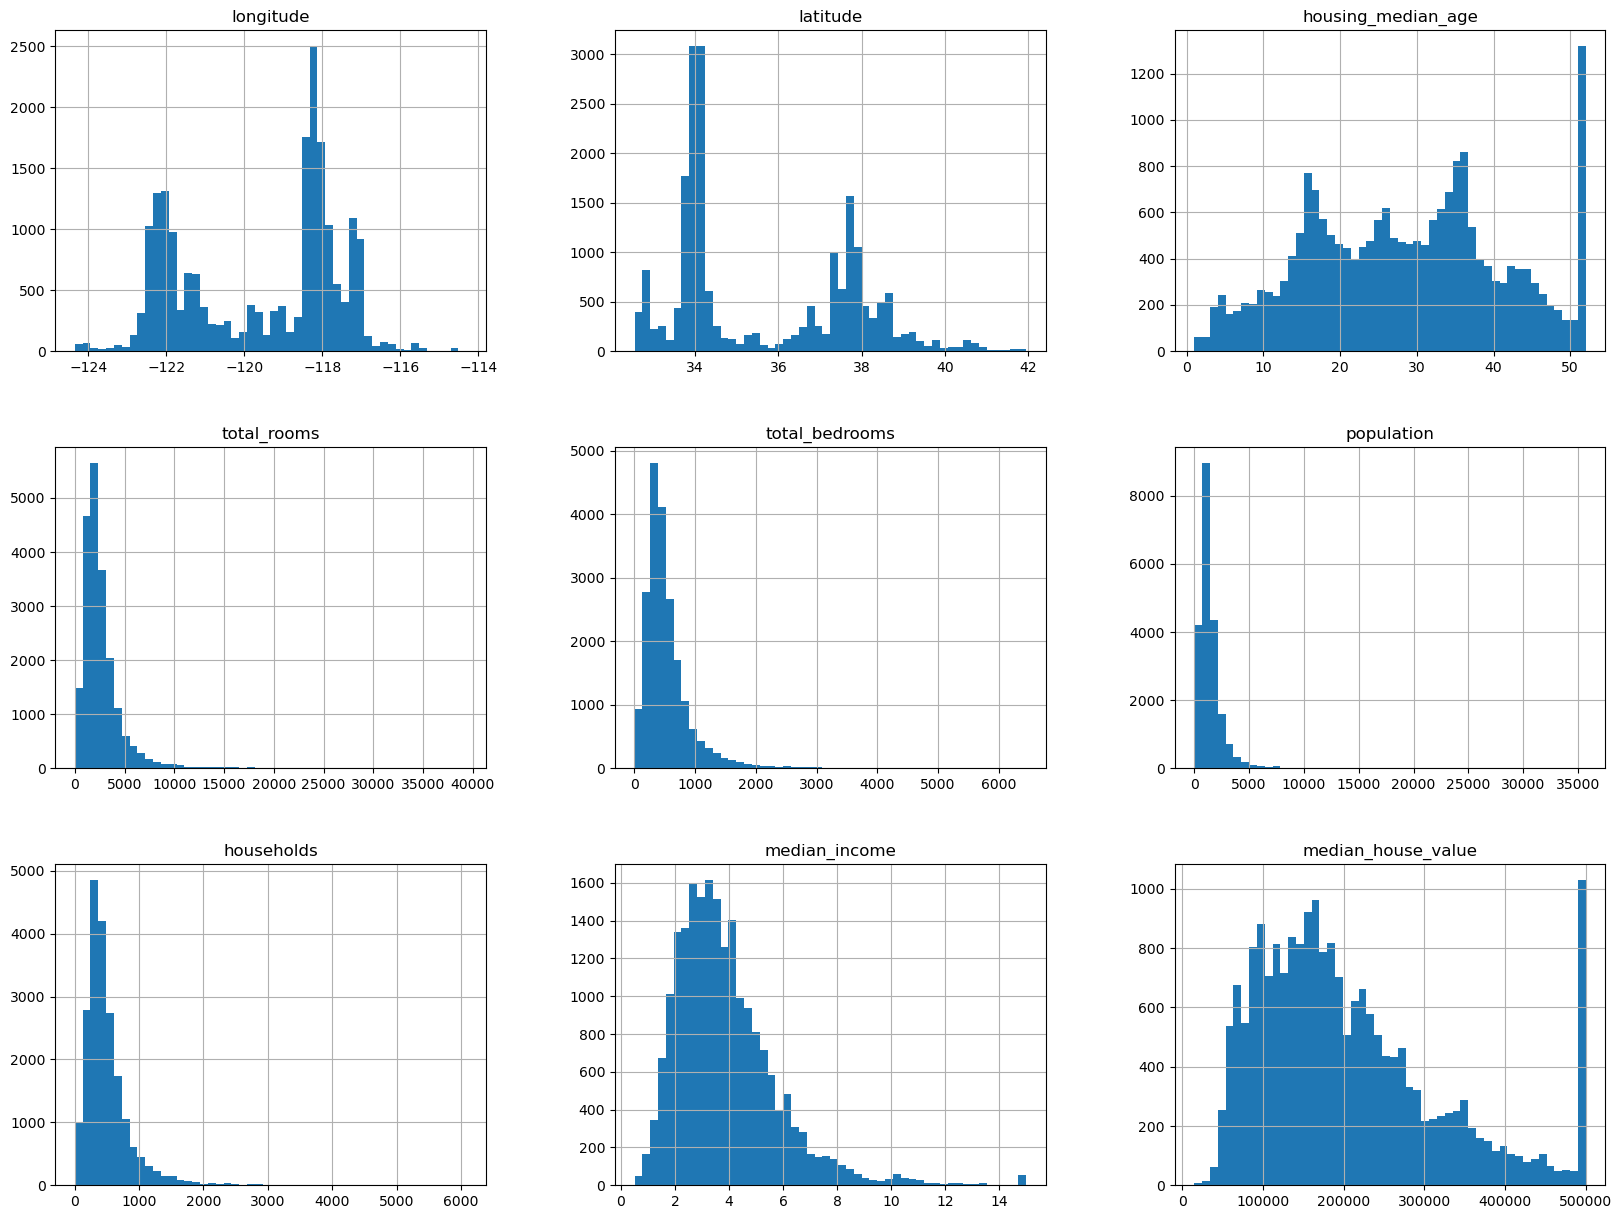

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

# Creating a test set

In [11]:
import numpy as np
def train_test_split1(data,test_ratio=0.2):
    np.random.seed(98)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(test_ratio*(len(data)))
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [12]:
train_data,test_data = train_test_split1(housing)

In [13]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16338,-121.34,38.05,16.0,667.0,92.0,267.0,90.0,5.6147,244700.0,INLAND
5989,-117.72,34.10,46.0,2477.0,458.0,1034.0,455.0,5.5000,289700.0,INLAND
13085,-121.35,38.56,16.0,2629.0,491.0,1265.0,485.0,4.5066,140200.0,INLAND
16178,-122.40,37.71,47.0,1649.0,328.0,1183.0,356.0,3.3625,223700.0,NEAR BAY
15154,-117.03,33.00,6.0,6139.0,793.0,2693.0,770.0,7.7569,387400.0,<1H OCEAN


In [14]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
 return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [15]:
def train_test_split(data,test_ratio,id_column):
    ids = data[id_column]
    test_ids = ids.apply(lambda x:test_set_check(x,test_ratio))
    return data.loc[~test_ids],data.loc[test_ids]
    
    

In [16]:
housing_with_index = housing.reset_index()
train_data,test_data = train_test_split(housing_with_index,.2,"index")

In [17]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [18]:
housing_with_index["Id"] = housing['longitude']*1000 + housing['latitude']
train_data,test_data = train_test_split(housing_with_index,.2,"Id")

In [19]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(housing,random_state=42,test_size=0.2)

In [20]:
temp1 = housing.drop(['median_income'],axis=1)
temp2 = housing['median_income']
x_train,x_test,y_train,y_test = train_test_split(temp1,temp2,test_size=0.2,random_state=42)

In [21]:
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,96500.0,INLAND


In [22]:
pd.DataFrame(housing['median_income'])

,median_income
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462
...,...
20635,1.5603
20636,2.5568
20637,1.7000
20638,1.8672


<AxesSubplot:>

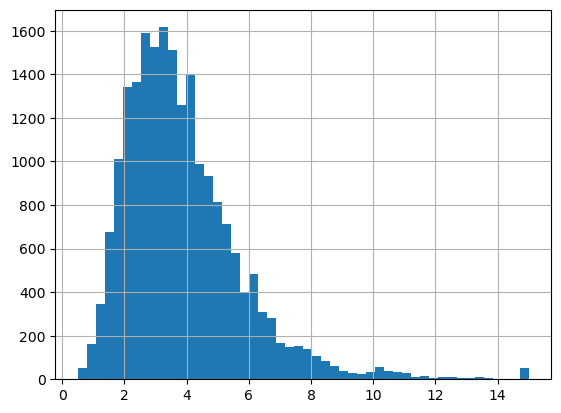

In [23]:
housing['median_income'].hist(bins=50)

In [24]:
housing['cat_income'] = pd.cut(housing['median_income'],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1,2,3,4,5])
housing['cat_income'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: cat_income, dtype: int64

In [25]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'cat_income'],
      dtype='object')

In [26]:
train_data,test_data = train_test_split(housing,random_state=42,test_size=0.2,stratify=housing['cat_income'])


In [27]:
train_data['cat_income'].value_counts()/len(train_data)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: cat_income, dtype: float64

In [28]:
test_data['cat_income'].value_counts()/len(test_data)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: cat_income, dtype: float64

In [29]:
for i in (train_data,test_data):
    i.drop('cat_income',axis=1,inplace=True)

In [30]:
test_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

# Visualizing Data

In [31]:
housing = train_data.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

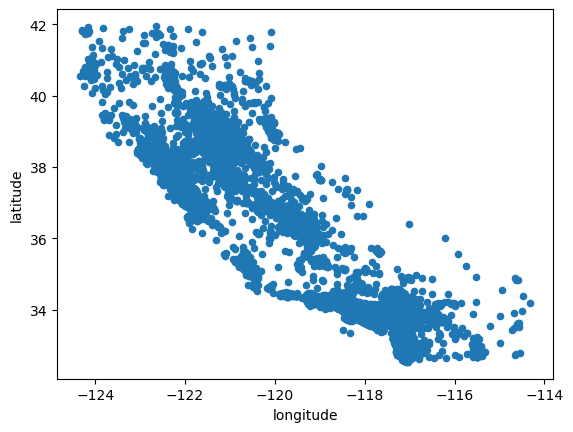

In [32]:
housing.plot(kind="scatter",x='longitude',y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

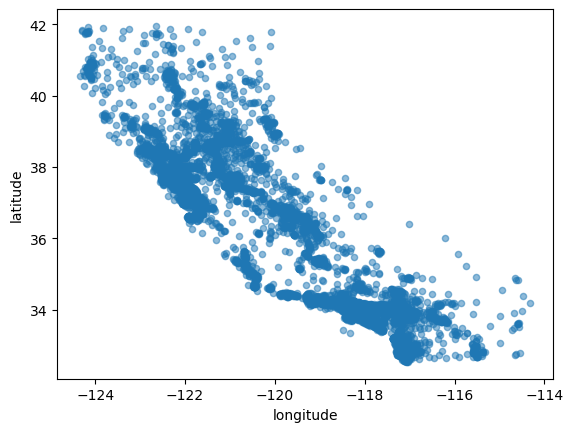

In [33]:
housing.plot(kind="scatter",x='longitude',y='latitude',alpha=0.5)

In [34]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

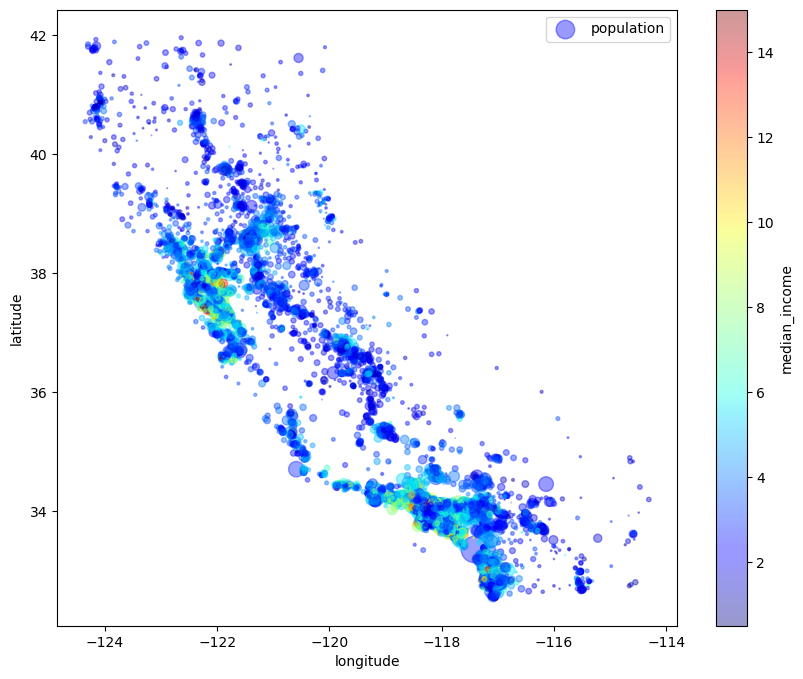

In [35]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing['population']/100,
            c="median_income",colorbar=True,cmap=plt.get_cmap("jet"),figsize=(10,8))
plt.legend(["population"])


attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]

In [36]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

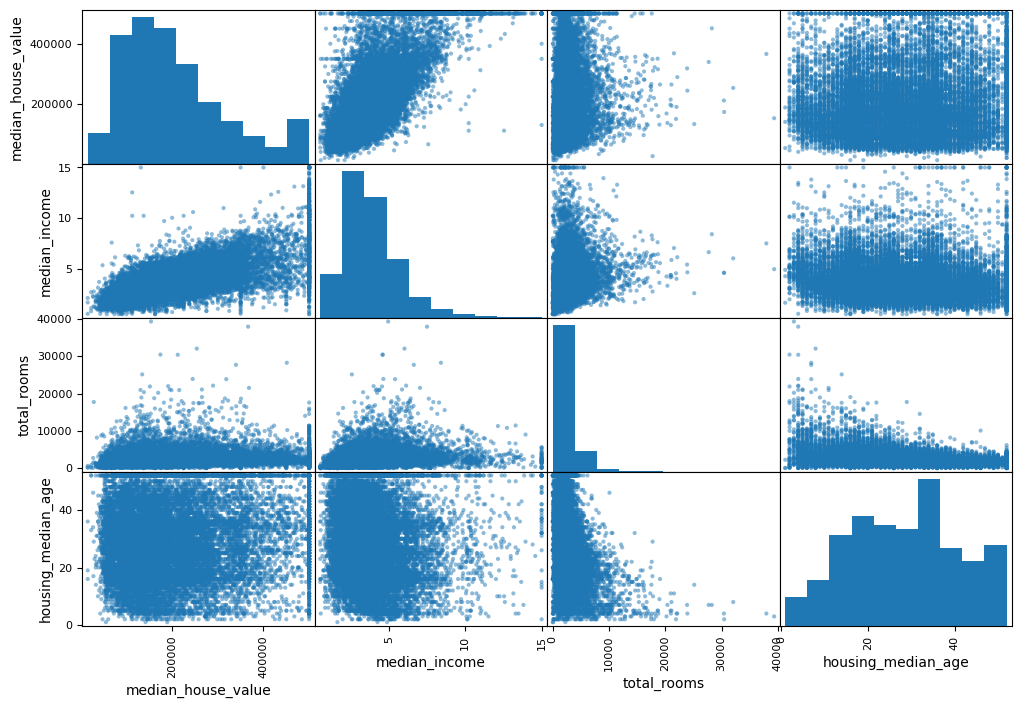

In [37]:
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
pd.plotting.scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

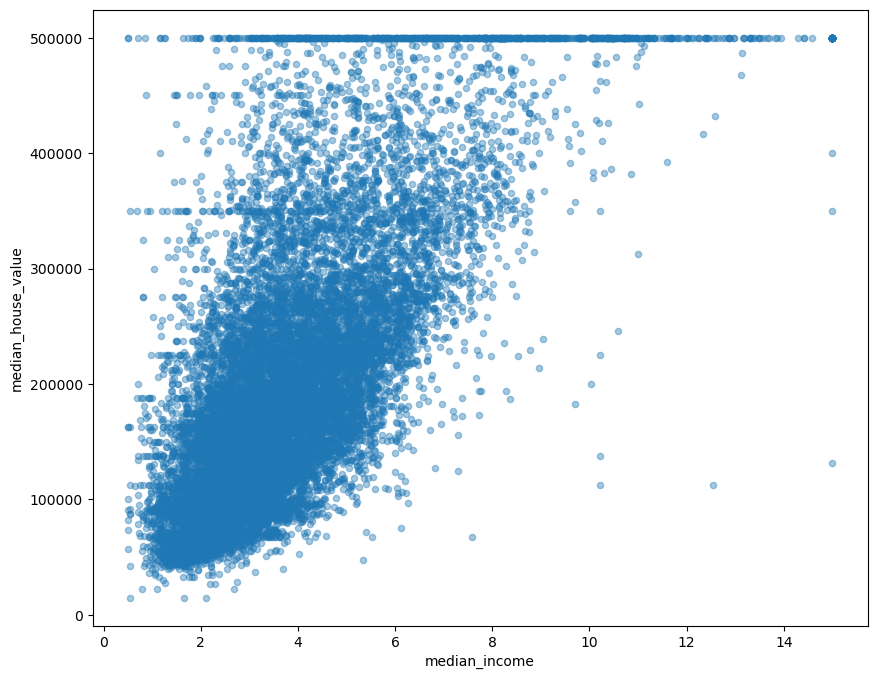

In [38]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",figsize=(10,8),alpha=0.4)

In [39]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [40]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["population_per_household"] = housing["population"]/housing["households"]
housing["bedrooms_per_households"] = housing["total_bedrooms"]/housing["households"]
housing["bedrooms_per_rooms"] = housing["total_bedrooms"]/housing["total_rooms"]

In [41]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
bedrooms_per_households    -0.043349
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_rooms         -0.259952
Name: median_house_value, dtype: float64

# Preparaing the data for machine learning

In [42]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'population_per_household', 'bedrooms_per_households',
       'bedrooms_per_rooms'],
      dtype='object')

In [43]:
housing = train_data.drop("median_house_value",axis=1)
housing_label = train_data["median_house_value"]

In [44]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


### handling missing values in numerical data

In [45]:
housing_num = housing.drop("ocean_proximity",axis=1)
median = housing["total_bedrooms"].median()
housing_num.fillna(median,inplace=True)
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [46]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_num)
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [47]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [48]:
housing_tn = pd.DataFrame(imputer.transform(housing_num),columns = housing_num.columns )
housing_tn                         

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


## handling values in  categorical data(converting into numerical data)

In [49]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [50]:
housing_cat = housing[["ocean_proximity"]]

In [51]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [52]:
# from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder()
housing_cat_encoded = ordinal.fit_transform(housing_cat)

In [53]:
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [54]:
housing_cat_encoded = pd.DataFrame(housing_cat_encoded)
housing_cat_encoded.value_counts()

0.0    7277
1.0    5262
4.0    2124
3.0    1847
2.0       2
dtype: int64

In [55]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
housing_cat_encoded = onehot.fit_transform(housing_cat)
housing_cat_encoded.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [56]:
onehot.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

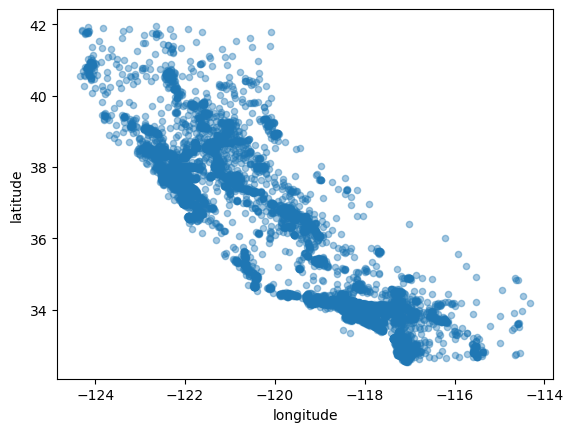

In [57]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4)

# Custom transformer

In [79]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6


class combinedattribute(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,x,y=None):
        return self
    def transform(self,X,y=None):
        population_per_household = X[:,population_ix]/X[:,households_ix]
        bedrooms_per_household = X[:,bedrooms_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,room_ix]
            return np.c_[X,population_per_household,bedrooms_per_household,bedrooms_per_room]
        else:
            return np.c_[X,population_per_household,bedrooms_per_household]
            
        

In [82]:
attr_adder = combinedattribute(add_bedrooms_per_room=False)
housing_extra_attr = attr_adder.transform(housing.values)
z = pd.DataFrame(housing_extra_attr)
z

,0,1,2,3,4,5,6,7,8,9,10
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,3.168555,1.128895
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,2.623698,1.113281
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,2.223333,1.033333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,1.859213,1.074534
4,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3.167241,1.113793
...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.09,<1H OCEAN,2.023976,1.22977
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND,3.363188,1.002821
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN,2.662791,0.965116
16510,-122.7,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN,2.411178,1.157685
